<a href="https://colab.research.google.com/github/Laxmi884/DA_ICC_International_T20/blob/main/Self_Project_Cricket_Scorecard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<b> The International Cricket Council (ICC) is the world governing body of cricket. It was founded as the Imperial Cricket Conference in 1909 by representatives from Australia, England and South Africa. It was renamed as the International Cricket Conference in 1965, and took up its current name in 1989. It organises world championship events such as Cricket World Cup, Women's Cricket World Cup, ICC T20 World Cup, ICC Women's T20 World Cup, ICC Champions Trophy and Under-19 Cricket World Cup.</b>

<br>

## <b> You recently got a lucky break in the field of Data Science. You got a job of Data Scientist at ICC. You are part of the Analytics Team which is involved in pre-match analyses, live-match analyses and post-match analyses. </b>

<br>

## <b>This data consists of 1417 T20 matches. Each row corresponds to a single T20 match. As a data scientist, you have to first explore the data and check its sanity. </b>

<br>

## <u><b>Further you are required to do some analyses :</b></u>
* ### Rename all the column names to their appropriate names, for example meta.created should be renamed as created_date
* ### Find out the top three venues which hosted the greatest number of matches.
* ### Find out the pair of cricket teams who played the most number of T20 matches against each other.
* ### Print the top five teams by their win percentages. Win percentage is defined as the number of matches won divided by the number of matches played and then multiplied by 100.
* ### Write a function to get the scorecard of each match. This function would take the innings value as argument and return two scorecard dataframes each for one team as shown below. So the first dataframe would contain the top 4 scorers of the team who batted first and the top 4 bowlers of the opponent team. And the second dataframe would contain the top 4 scorers of the team who batted second and the top 4 bowlers of the opponent team.




# <b><center> A sample scorecard </center></b>

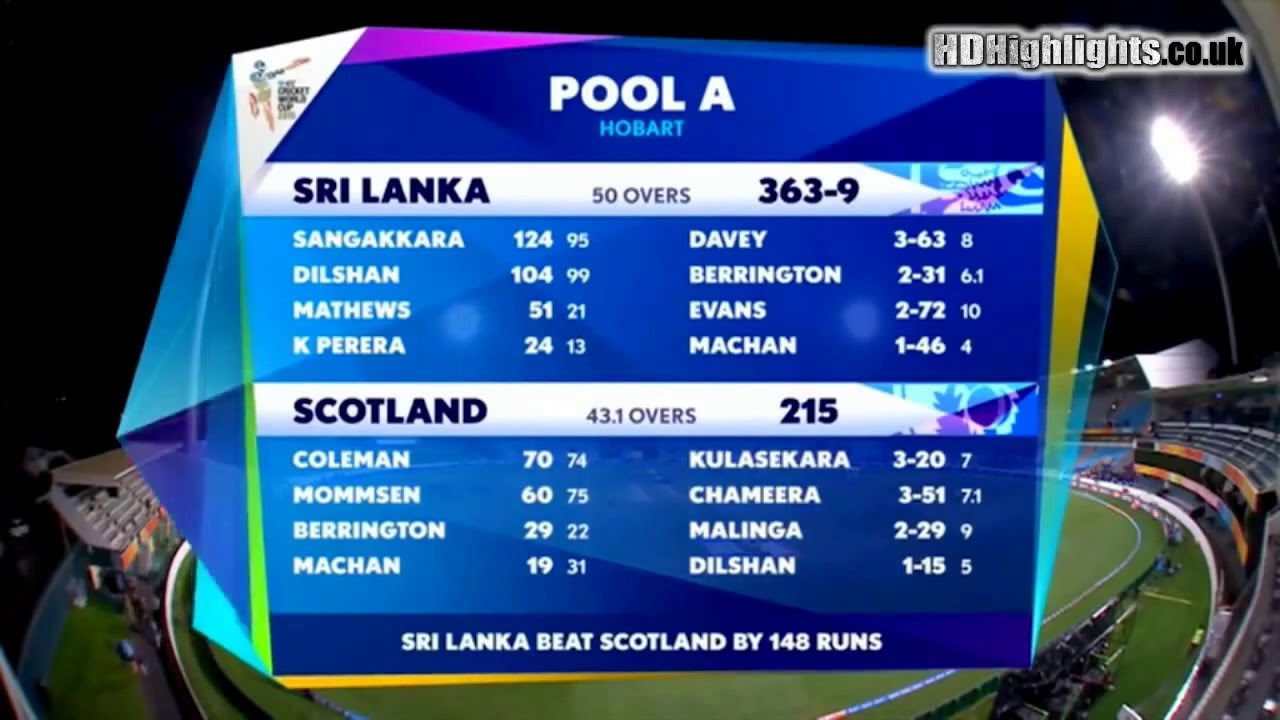

In [53]:
#Import package
import pandas as pd
import numpy as np
import seaborn as sns

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
 pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows',50)

In [34]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Copy of International_T20_Data.csv',parse_dates=['meta.created'])

In [35]:
df.head()

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,info.city,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['SD Fry', 'SJ Nogajski']","Simonds Stadium, South Geelong",Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,['A Zampa'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Adelaide Oval,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,NaN,"['Ireland', 'Hong Kong']",bat,Hong Kong,"['R Black', 'AJ Neill']","Bready Cricket Club, Magheramason",Londonderry,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,['E Chigumbura'],"['Zimbabwe', 'India']",field,India,"['TJ Matibiri', 'RB Tiffin']",Harare Sports Club,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   innings                      1417 non-null   object        
 1   meta.data_version            1417 non-null   float64       
 2   meta.created                 1417 non-null   datetime64[ns]
 3   meta.revision                1417 non-null   int64         
 4   info.dates                   1417 non-null   object        
 5   info.gender                  1417 non-null   object        
 6   info.match_type              1417 non-null   object        
 7   info.outcome.by.wickets      651 non-null    float64       
 8   info.outcome.winner          1372 non-null   object        
 9   info.overs                   1417 non-null   int64         
 10  info.player_of_match         1255 non-null   object        
 11  info.teams                   1417 non-null 

# Rename all the column names to their appropriate names, for example meta.created should be renamed as created_date

In [44]:
df.columns = [x.replace('.','_').replace('info_','').replace('meta_','') for x in list(df.columns)]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   innings                 1417 non-null   object        
 1   data_version            1417 non-null   float64       
 2   match_date              1417 non-null   datetime64[ns]
 3   revision                1417 non-null   int64         
 4   dates                   1417 non-null   object        
 5   gender                  1417 non-null   object        
 6   match_type              1417 non-null   object        
 7   outcome_by_wickets      651 non-null    float64       
 8   winner                  1372 non-null   object        
 9   overs                   1417 non-null   int64         
 10  player_of_match         1255 non-null   object        
 11  teams                   1417 non-null   object        
 12  toss_decision           1417 non-null   object  

# Find out the top three venues which hosted the greatest number of matches.


In [46]:
most_no_matches_venue = df['venue'].value_counts().reset_index()

In [47]:
most_no_matches_venue.rename(columns={'index':'venue','venue':'matches_hosted'},inplace=True)

In [48]:
most_no_matches_venue.sort_values('matches_hosted',ascending=False).head()

,venue,matches_hosted
0,Dubai International Cricket Stadium,62
1,Sheikh Zayed Stadium,41
2,Shere Bangla National Stadium,39
3,R Premadasa Stadium,35
4,Kinrara Academy Oval,32


# Find out the pair of cricket teams who played the most number of T20 matches against each other.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   innings                      1417 non-null   object        
 1   data_version                 1417 non-null   float64       
 2   match_date                   1417 non-null   datetime64[ns]
 3   meta.revision                1417 non-null   int64         
 4   info.dates                   1417 non-null   object        
 5   info.gender                  1417 non-null   object        
 6   info.match_type              1417 non-null   object        
 7   outcome_by_wickets           651 non-null    float64       
 8   winner                       1372 non-null   object        
 9   overs                        1417 non-null   int64         
 10  player_of_match              1255 non-null   object        
 11  teams                        1417 non-null 

In [43]:
df.loc[0,'teams']

"['Australia', 'Sri Lanka']"

In [51]:
# Convereting the teams column to appropriate data type and then retrieving the teams into team1 and team2 
df['team1'] = df['teams'].apply(lambda x: eval(x)[0])
df['team2'] = df['teams'].apply(lambda x: eval(x)[1])

In [52]:
df.head()

,innings,data_version,match_date,revision,dates,gender,match_type,outcome_by_wickets,winner,overs,player_of_match,teams,toss_decision,toss_winner,umpires,venue,city,outcome_by_runs,match_type_number,neutral_venue,outcome_method,outcome_result,outcome_eliminator,supersubs_New Zealand,supersubs_South Africa,bowl_out,outcome_bowl_out,team1,team2
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,Sri Lanka
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['SD Fry', 'SJ Nogajski']","Simonds Stadium, South Geelong",Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,Sri Lanka
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,['A Zampa'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Adelaide Oval,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,Sri Lanka
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,NaN,"['Ireland', 'Hong Kong']",bat,Hong Kong,"['R Black', 'AJ Neill']","Bready Cricket Club, Magheramason",Londonderry,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ireland,Hong Kong
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,['E Chigumbura'],"['Zimbabwe', 'India']",field,India,"['TJ Matibiri', 'RB Tiffin']",Harare Sports Club,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe,India


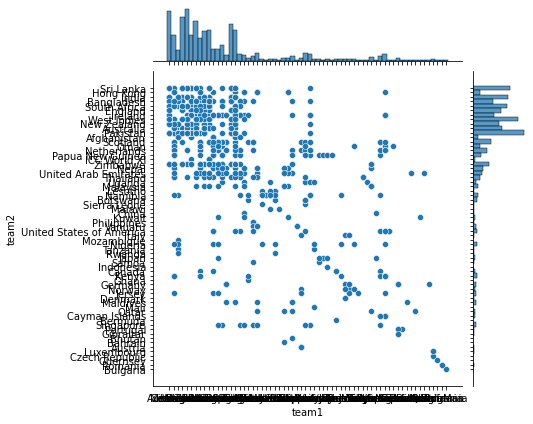

In [54]:
sns.jointplot(x='team1',y='team2',data=df)

In [57]:
teams = sorted(list(set(df['team1'])|set(df['team2'])))

In [59]:
match_matrix = np.zeros((len(teams),len(teams)),dtype=int)

In [62]:
for i,row in df.iterrows():
  match_matrix[teams.index(row['team1'])][teams.index(row['team2'])]+=1
  match_matrix[teams.index(row['team2'])][teams.index(row['team1'])]+=1

In [65]:
print(match_matrix)

[[ 0  0  0 ...  0  7  9]
 [ 0  0  0 ...  0 20  3]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 7 20  0 ...  0  0  3]
 [ 9  3  0 ...  0  3  0]]


In [67]:
#creating a function to retrieve index from matrix of maxium num
def find_index(a,val):
  for i in range(len(a)):
    for j in range(len(a)):
      if a[i][j] == val or a[j][i]== val:
        return i,j

In [68]:
teams_index = find_index(match_matrix,match_matrix.max())

In [76]:
print(f'The two teams that played against each othe the most are {teams[teams_index[0]]} and {teams[teams_index[-1]]} and they played {match_matrix.max()} matches')

The two teams that played against each othe the most are Australia and England and they played 45 matches
